### Importing Needed packages

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing 
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

### Reading the data

In [3]:
df = pd.read_csv("TehranHousePrice.csv")

# take a look at the dataset
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


### Changing the string type data of Area column to float

In [4]:
df['Address'].replace('', np.nan, inplace=True)
df.dropna(subset=['Address'], inplace=True)
df.head(664)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
660,86,2,True,True,True,Komeil,1978000000,65933.33
661,95,2,True,True,True,Punak,4200000000,140000.00
663,88,2,True,True,True,Valiasr,2024000000,67466.67
664,93,2,True,True,True,Amir Bahador,2139000000,71300.00


In [5]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


### Turning string type data to numbers by LabelEncoder

In [6]:
df['Area'] = df['Area'].str.replace(',', '')
df['Area'] = df['Area'].astype(float)

df = df[df['Area'] < 1000]



### Selecting the columns we need 

In [7]:
from sklearn.preprocessing import LabelEncoder
encode_address = LabelEncoder()
df['Address'] = encode_address.fit_transform(df['Address'])

encode_parking = LabelEncoder()
df.Parking = encode_parking.fit_transform(df.Parking)

encode_elevator = LabelEncoder()
df.Elevator = encode_elevator.fit_transform(df.Elevator)

df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,True,1,156,1850000000,61666.67
1,60.0,1,1,True,1,156,1850000000,61666.67
2,79.0,2,1,True,1,117,550000000,18333.33
3,95.0,2,1,True,1,152,902500000,30083.33
4,123.0,2,1,True,1,150,7000000000,233333.33
5,70.0,2,1,True,0,106,2050000000,68333.33
6,87.0,2,1,True,1,117,600000000,20000.00
7,59.0,1,1,True,1,156,2150000000,71666.67
8,54.0,2,1,True,0,13,493000000,16433.33
9,71.0,1,1,True,1,183,2370000000,79000.00


### Turning some coloumns into numpy and normalizing them to draw plot 

In [8]:
cdf = df[['Area', 'Parking', 'Elevator', 'Address', 'Price']]
cdf.head(664)


,Area,Parking,Elevator,Address,Price
0,63.0,1,1,156,1850000000
1,60.0,1,1,156,1850000000
2,79.0,1,1,117,550000000
3,95.0,1,1,152,902500000
4,123.0,1,1,150,7000000000
...,...,...,...,...,...
661,95.0,1,1,122,4200000000
663,88.0,1,1,176,2024000000
664,93.0,1,1,10,2139000000
665,70.0,1,1,12,1630000000


In [9]:
cdf.describe()

,Area,Parking,Elevator,Address,Price
count,3450.000000,3450.000000,3450.000000,3450.000000,3.450000e+03
mean,106.917391,0.847536,0.787536,104.998841,5.375563e+09
std,69.550976,0.359522,0.409111,50.321575,8.125918e+09
min,30.000000,0.000000,0.000000,0.000000,3.600000e+06
25%,69.000000,1.000000,1.000000,61.000000,1.419250e+09
50%,90.000000,1.000000,1.000000,117.000000,2.900000e+09
75%,120.000000,1.000000,1.000000,146.000000,6.000000e+09
max,929.000000,1.000000,1.000000,191.000000,9.240000e+10


In [10]:
cdf.corr()

,Area,Parking,Elevator,Address,Price
Area,1.000000,0.197890,0.051473,-0.127673,0.722611
Parking,0.197890,1.000000,0.430213,0.021754,0.191221
Elevator,0.051473,0.430213,1.000000,0.072955,0.111745
Address,-0.127673,0.021754,0.072955,1.000000,-0.075901
Price,0.722611,0.191221,0.111745,-0.075901,1.000000


### Turning some coloumns into numpy and normalizing them to draw plot 

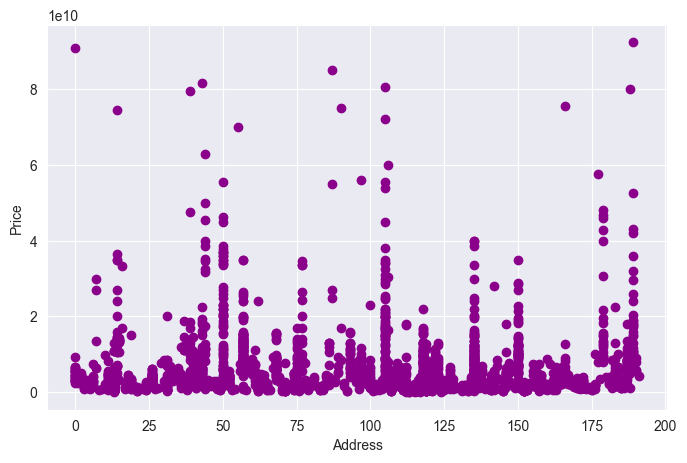

In [11]:
plt.figure(figsize=(8,5))

plt.scatter(cdf.Address, cdf.Price, color = 'darkMagenta')
plt.ylabel('Price')
plt.xlabel('Address')
plt.show()

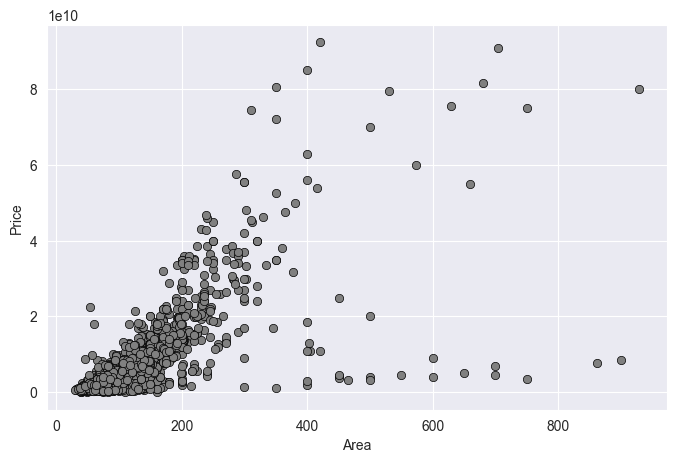

In [12]:
plt.figure(figsize=(8,5))

plt.scatter(x = cdf.Area, y = cdf.Price, color = 'gray', edgecolors="#000000", linewidths=0.5)
plt.ylabel('Price')
plt.xlabel('Area')
plt.show()

In [13]:
outlirt_columns = ["Area"] + \
                  [col for col in cdf.columns if "Price" in col]
cdf[cdf["Area"] > 400][outlirt_columns]

,Area,Price
284,450.0,4200000000
285,500.0,3900000000
356,650.0,5200000000
431,660.0,55000000000
573,863.0,7830000000
583,415.0,53950000000
732,420.0,11000000000
819,680.0,81600000000
831,750.0,75000000000
1236,600.0,9150000000


In [14]:
cdf = cdf[cdf['Area']<400]

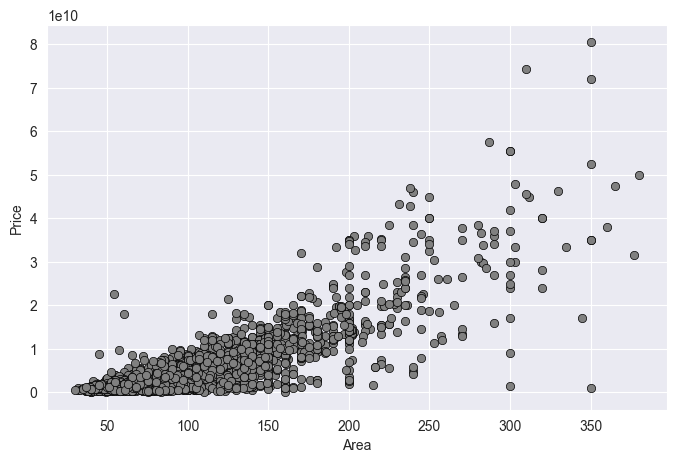

In [15]:
plt.figure(figsize=(8,5))

plt.scatter(x = cdf.Area, y = cdf.Price, color = 'gray', edgecolors="#000000", linewidths=0.5)
plt.ylabel('Price')
plt.xlabel('Area')
plt.show()

In [16]:
cdf.reset_index(drop=True, inplace=True)

<Axes: xlabel='Price'>

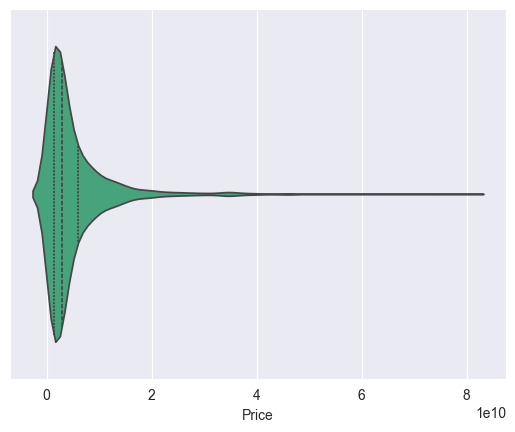

In [17]:
sns.violinplot(x = cdf.Price, inner = 'quartile', color = "#36B37E")


<Axes: ylabel='Price'>

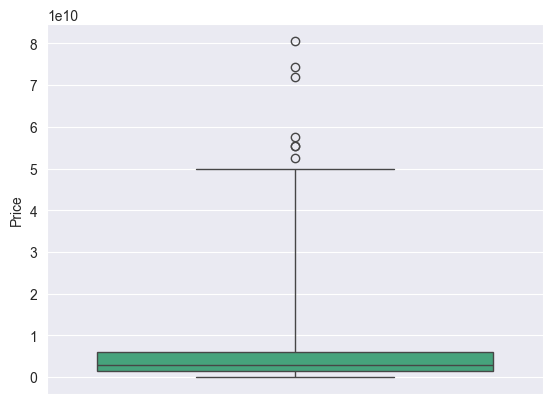

In [18]:
sns.boxplot(cdf.Price, whis = 10, color = "#36B37E")

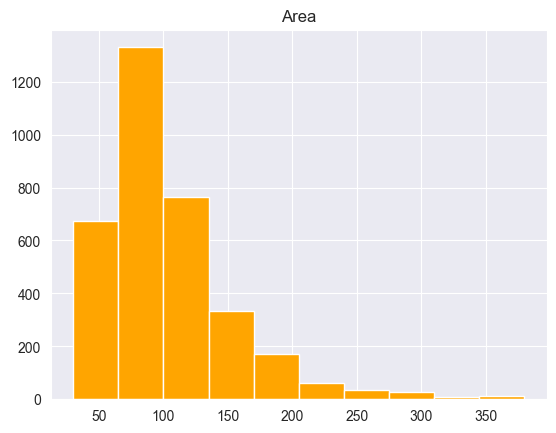

In [19]:

cdf.Area.hist(color = 'orange')
plt.title('Area')
plt.show()

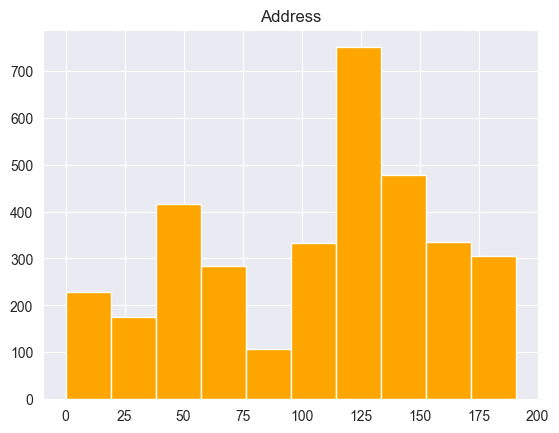

In [20]:
cdf.Address.hist(color = 'orange')
plt.title('Address')
plt.show()

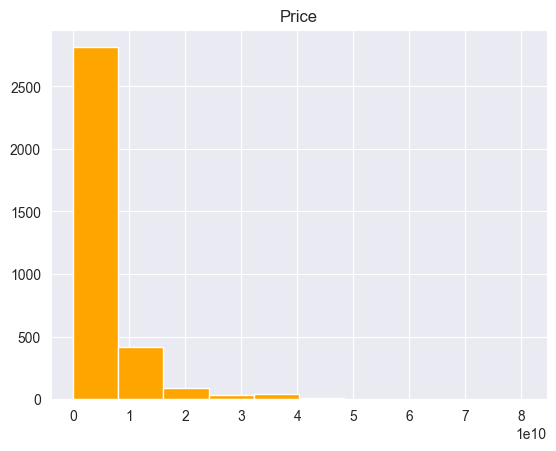

In [21]:
cdf.Price.hist(color = 'orange')
plt.title('Price')
plt.show()

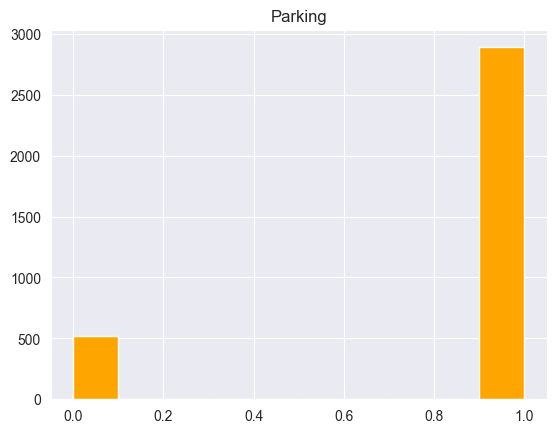

In [22]:
cdf.Parking.hist(color = 'orange')
plt.title('Parking')
plt.show()

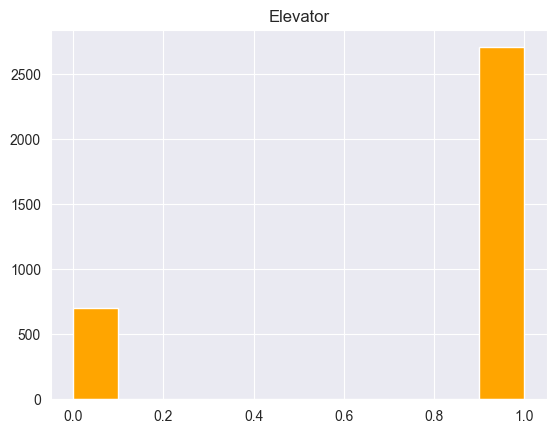

In [23]:
cdf.Elevator.hist(color = 'orange')
plt.title('Elevator')
plt.show()

### Creating train and test dataset

In [24]:
X = cdf[['Area', 'Address']]
Y = cdf[['Price']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 45)

st_x = StandardScaler()
x_train_std = st_x.fit_transform(x_train)
x_test_std = st_x.transform(x_test)

print(x_train_std)
print(x_test_std)

[[ 0.68922461  0.58694992]
 [-0.7223614   0.32626616]
 [ 0.23915371  0.26610837]
 ...
 [-0.25183273  0.32626616]
 [ 0.25961148 -1.29799417]
 [ 0.566478    1.46926417]]
[[ 0.44373139  0.80752848]
 [-0.90648131  0.32626616]
 [-0.10862835  1.32889599]
 ...
 [ 0.97563337 -0.17504876]
 [-0.04725505 -0.97715262]
 [-0.3336638  -0.97715262]]


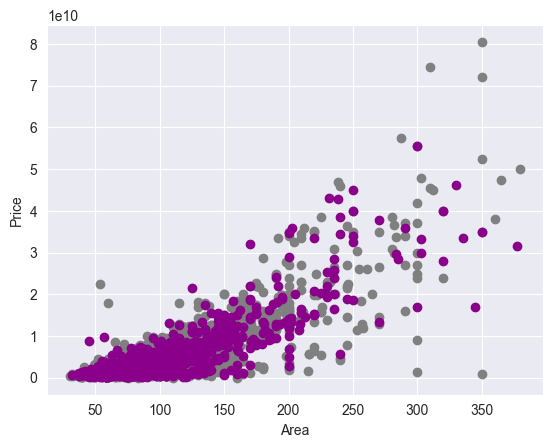

In [25]:
# two scatter in one chart
fig = plt.figure()
sct1= fig.add_subplot()
sct1.scatter(x_train.Area, y_train.Price,  color='gray')
sct1.scatter(x_test.Area, y_test.Price,  color='darkmagenta')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

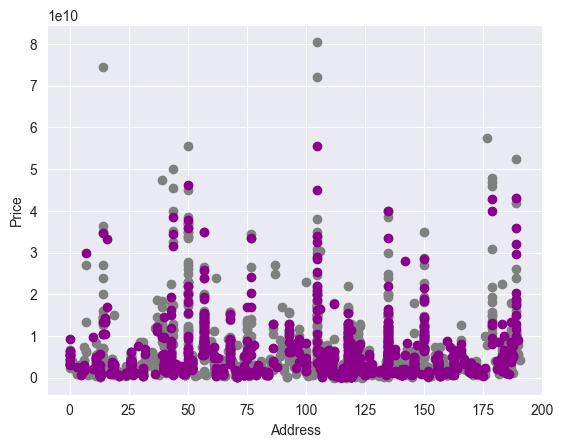

In [26]:
# two scatter in one chart
fig = plt.figure()
sct1= fig.add_subplot()
sct1.scatter(x_train.Address, y_train.Price,  color='gray')
sct1.scatter(x_test.Address, y_test.Price,  color='darkmagenta')
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()

### Multiple Regression Model

In [27]:
reg = LinearRegression()
reg.fit(x_train_std, y_train)

# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ', reg.intercept_)


Coefficients:  [[5.55143327e+09 1.68811165e+07]]
Intercept:  [5.09044715e+09]


### Prediction

In [28]:
y_predict = reg.predict(x_test_std)
mse = mean_squared_error(y_test, y_predict)
print(f'MSE = {mse}')
r_squered = r2_score(y_test, y_predict)
print(f'R2 = {r_squered}')

MSE = 1.3758925880585667e+19
R2 = 0.6971359000219246


In [29]:
rdg = Ridge(alpha = 1.0)
rdg.fit(x_train_std, y_train)
y_predict_rdg = rdg.predict(x_test_std)
mse_rdg = mean_squared_error(y_test, y_predict)
print(f'MSE = {mse_rdg}' )
r_squared_rdg = r2_score(y_test, y_predict)
print(f'R2 = {r_squared_rdg}')

MSE = 1.3758925880585667e+19
R2 = 0.6971359000219246


In [30]:
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,True,1,156,1850000000,61666.67
1,60.0,1,1,True,1,156,1850000000,61666.67
2,79.0,2,1,True,1,117,550000000,18333.33
3,95.0,2,1,True,1,152,902500000,30083.33
4,123.0,2,1,True,1,150,7000000000,233333.33
5,70.0,2,1,True,0,106,2050000000,68333.33
6,87.0,2,1,True,1,117,600000000,20000.00
7,59.0,1,1,True,1,156,2150000000,71666.67
8,54.0,2,1,True,0,13,493000000,16433.33
9,71.0,1,1,True,1,183,2370000000,79000.00


In [31]:
st_new = StandardScaler()
x_new = st_new.fit_transform([[63, 156]])
y_p = reg.predict(x_new)
print(y_p)

[[5.09044715e+09]]
